In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cells = pd.read_csv('data/exc_cells.csv', index_col=[0])
synapses = pd.read_csv('data/all_synapses.csv', index_col=[0])
nonzero_disp = pd.read_csv('data/nonzero_displacements.csv', index_col=[0]).to_numpy()

In [9]:
disp_mean = nonzero_disp.mean(axis=0)
zero_centered = nonzero_disp - disp_mean

# PCA
cov = np.cov(zero_centered.T)
eig_vals, eig_vecs = np.linalg.eig(cov)
print(eig_vals)

[27502.52125478 13936.85591069  7210.95644116]


In [12]:
isometric_disp = pd.read_csv('data/isometric_nonzero_displacements.csv', index_col=[0]).to_numpy()

In [26]:
mags = np.linalg.norm(isometric_disp, axis=1)
mags_mean = mags.mean(axis=0)
mags_std = mags.std(axis=0)

In [45]:
rayleigh_sig_sq = (1 / (2*len(mags))) * np.sum(mags**2)
rayleigh_sig = np.sqrt(rayleigh_sig_sq)

dummy_mags = np.linspace(0,0.08,100)
rayleigh = (dummy_mags / rayleigh_sig_sq) * np.exp(-dummy_mags**2 / (2*rayleigh_sig_sq))

54.58295338346343


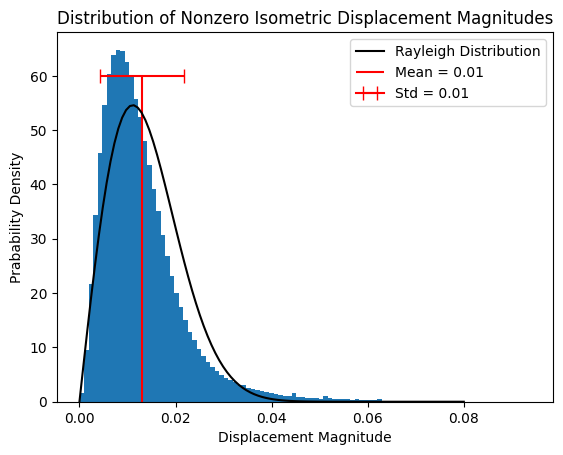

In [41]:
plt.figure()
plt.hist(mags, bins=100, density=True)
plt.xlabel('Displacement Magnitude')
plt.ylabel('Prabability Density')
plt.title('Distribution of Nonzero Isometric Displacement Magnitudes')
plt.vlines(mags_mean, 0, 60, color='red', label=f'Mean = {mags_mean:.2f}')
plt.errorbar(mags_mean, 60, xerr=mags_std, color='red', capsize=5, label='Std = {:.2f}'.format(mags_std))
plt.plot(dummy_mags, rayleigh, color='black', label='Rayleigh Distribution')
plt.legend()
plt.show()

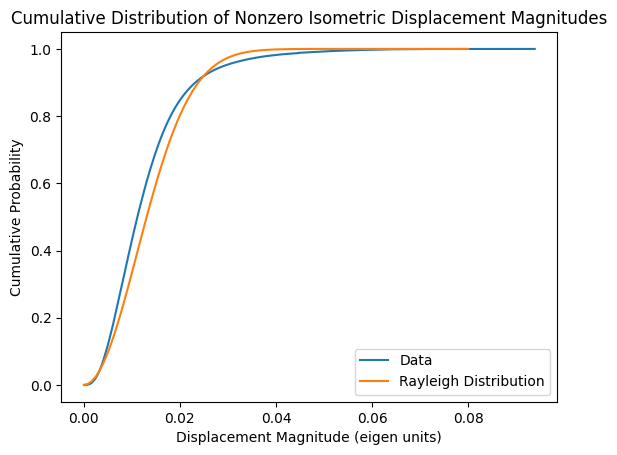

In [48]:
plt.figure()
mags_sorted = np.sort(mags)
rayleigh_cdf = 1 - np.exp(-dummy_mags**2 / (2*rayleigh_sig_sq))
y_mags = np.arange(len(mags_sorted))/float(len(mags_sorted))
plt.plot(mags_sorted, y_mags, label='Data')
plt.plot(dummy_mags, rayleigh_cdf, label='Rayleigh Distribution')
plt.xlabel('Displacement Magnitude (eigen units)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Nonzero Isometric Displacement Magnitudes')
plt.legend()
plt.show()